Target 4.2

In [42]:
import pandas as pd;
import numpy as np;

#read the file and remove countries with less than 3 values.
df_42 = pd.read_excel("Target4.2.xlsx", sheet_name="Data").copy();
#print(df_42.isnull().sum(axis=1));
temp = df_42.isnull().sum(axis=1);
row_to_delete = temp[temp > 15].index;
df_42_data = df_42.drop(labels=row_to_delete);
#print(df_42_new.info());
#print(df_42_new);

df_meta = pd.read_excel("Target4.2.xlsx", sheet_name="Country - Metadata")[['Code', "Income Group"]].copy();
df_meta["Income Group"] = df_meta["Income Group"].fillna("Unknown income");
#print(df_meta);
df_meta.rename(columns={"Code":"Country Code"}, inplace=True);
df_42_new = pd.merge(df_42_data, df_meta, how="left", on="Country Code");
#print(df_42_new);

Impute Method: 

1.Constant value (median)

In [43]:
#manipulate the dataframe before imputation
temp = df_42_new.copy();
countryNames = temp['Country Code'].values.tolist();

temp = temp.drop(['Series Name', 'Series Code', 'Country Name', 'Country Code'], axis=1);

temp_T = temp.T;
temp_T.columns = countryNames;
temp_T.index = list(range(2004,2023));
temp_T.rename(index={2022:"Income Group"}, inplace=True);
#print(temp_T);

In [44]:
#method to calculate median
temp_median = temp_T.copy();

for x in temp_median.columns:
  #remove the last row temporary
  res = temp_median[x][:-1];
  temp_median[x] = temp_median[x].fillna(res.median());
print(temp_median.T);

temp_median.T.to_csv("Target4.2_median.csv");

          2004       2005       2006        2007       2008       2009  \
ALB  49.662521  51.289982  53.768742   54.838661  58.609558   61.71825   
DZA    4.72231    6.17514  29.035191    30.09886  36.259281  80.292717   
AGO  89.285824  89.285824  89.285824  135.918228  99.419777  92.734177   
ATG  88.406715  88.406715  88.406715   82.726624  84.778702  88.406715   
ARG  62.300331  63.747009  63.676048   64.637627  66.605003  68.051041   
..         ...        ...        ...         ...        ...        ...   
SSF  19.188101   19.84598   21.30093    19.85103  19.666889   21.02854   
SSA  19.184151   19.84218    21.2973   19.847309   19.66313   21.02491   
TSS  19.188101   19.84598   21.30093    19.85103  19.666889   21.02854   
UMC  44.511639   45.50843     47.479   49.347462  51.551609  53.461449   
WLD  35.686111  37.536839  39.554859   40.974258  42.602951   44.19175   

          2010       2011       2012       2013       2014       2015  \
ALB  65.038551  70.003304  77.326881  

2.Constant value (mean)

In [45]:
#method to calculate mean
temp_mean = temp_T.copy();

for x in temp_mean.columns:
  #remove the last row temporary
  res = temp_mean[x][:-1];
  temp_mean[x] = temp_mean[x].fillna(res.mean());
print(temp_mean.T);

temp_mean.T.to_csv("Target4.2_mean.csv");

          2004       2005       2006        2007       2008       2009  \
ALB  49.662521  51.289982  53.768742   54.838661  58.609558   61.71825   
DZA    4.72231    6.17514  29.035191    30.09886  36.259281  80.292717   
AGO  87.808275  87.808275  87.808275  135.918228  99.419777  92.734177   
ATG  85.316064  85.316064  85.316064   82.726624  84.778702  85.316064   
ARG  62.300331  63.747009  63.676048   64.637627  66.605003  68.051041   
..         ...        ...        ...         ...        ...        ...   
SSF  19.188101   19.84598   21.30093    19.85103  19.666889   21.02854   
SSA  19.184151   19.84218    21.2973   19.847309   19.66313   21.02491   
TSS  19.188101   19.84598   21.30093    19.85103  19.666889   21.02854   
UMC  44.511639   45.50843     47.479   49.347462  51.551609  53.461449   
WLD  35.686111  37.536839  39.554859   40.974258  42.602951   44.19175   

          2010       2011       2012       2013       2014       2015  \
ALB  65.038551  70.003304  77.326881  

3.Time series based (forward fill)

In [46]:
temp_ffill = temp_T.copy();

for x in temp_ffill.columns:
  temp_ffill[x] = temp_ffill[x].fillna(method="ffill");

temp_ffill = temp_ffill.fillna(0);
print(temp_ffill.T);
temp_ffill.T.to_csv("Target4.2_ffill.csv");

          2004       2005       2006        2007       2008       2009  \
ALB  49.662521  51.289982  53.768742   54.838661  58.609558   61.71825   
DZA    4.72231    6.17514  29.035191    30.09886  36.259281  80.292717   
AGO          0          0          0  135.918228  99.419777  92.734177   
ATG          0          0          0   82.726624  84.778702  84.778702   
ARG  62.300331  63.747009  63.676048   64.637627  66.605003  68.051041   
..         ...        ...        ...         ...        ...        ...   
SSF  19.188101   19.84598   21.30093    19.85103  19.666889   21.02854   
SSA  19.184151   19.84218    21.2973   19.847309   19.66313   21.02491   
TSS  19.188101   19.84598   21.30093    19.85103  19.666889   21.02854   
UMC  44.511639   45.50843     47.479   49.347462  51.551609  53.461449   
WLD  35.686111  37.536839  39.554859   40.974258  42.602951   44.19175   

          2010       2011       2012       2013       2014       2015  \
ALB  65.038551  70.003304  77.326881  

4.Time series based (backward fill)

In [47]:
temp_bfill = temp_T.copy();
lastRow = temp_bfill.copy().iloc[-1:];
temp_bfill = temp_bfill[:-1];

for x in temp_bfill.columns:
  temp_bfill[x] = temp_bfill[x].fillna(method="bfill");

temp_bfill = temp_bfill.fillna(0);
temp_bfill = temp_bfill.append(lastRow);
print(temp_bfill.T);
temp_bfill.T.to_csv("Target4.2_bfill.csv");

           2004        2005        2006        2007       2008       2009  \
ALB   49.662521   51.289982   53.768742   54.838661  58.609558   61.71825   
DZA     4.72231     6.17514   29.035191    30.09886  36.259281  80.292717   
AGO  135.918228  135.918228  135.918228  135.918228  99.419777  92.734177   
ATG   82.726624   82.726624   82.726624   82.726624  84.778702  93.696381   
ARG   62.300331   63.747009   63.676048   64.637627  66.605003  68.051041   
..          ...         ...         ...         ...        ...        ...   
SSF   19.188101    19.84598    21.30093    19.85103  19.666889   21.02854   
SSA   19.184151    19.84218     21.2973   19.847309   19.66313   21.02491   
TSS   19.188101    19.84598    21.30093    19.85103  19.666889   21.02854   
UMC   44.511639    45.50843      47.479   49.347462  51.551609  53.461449   
WLD   35.686111   37.536839   39.554859   40.974258  42.602951   44.19175   

          2010       2011       2012       2013       2014       2015  \
AL

5.Advanced method (linear regression)

In [48]:
from sklearn.linear_model import LinearRegression;
regression = LinearRegression();

temp_regr = temp_T.copy();
lastRow = temp_regr.copy().iloc[-1:];
temp_regr = temp_regr.iloc[:-1];

for x in temp_regr.columns:
  temp = temp_regr[x].copy();
  X_test = temp[temp.isnull()==True];

  if(len(X_test.index)>0):
    train = temp[temp.isnull()==False];
    regression.fit(np.array(train.index).reshape(-1,1), np.array(train.values).reshape(-1,1));
    y_predict = regression.predict(np.array(X_test.index).reshape(-1,1));
    temp[temp.isnull()==True] = y_predict;
    temp_regr[x] = temp;

temp_regr = temp_regr.append(lastRow);
print(temp_regr.T)

temp_regr.T.to_csv("Target4.2_regr.csv");

           2004        2005        2006        2007       2008       2009  \
ALB   49.662521   51.289982   53.768742   54.838661  58.609558   61.71825   
DZA     4.72231     6.17514   29.035191    30.09886  36.259281  80.292717   
AGO  145.569715  136.202995  126.836275  135.918228  99.419777  92.734177   
ATG   97.815839   96.362377   94.908915   82.726624  84.778702  76.013905   
ARG   62.300331   63.747009   63.676048   64.637627  66.605003  68.051041   
..          ...         ...         ...         ...        ...        ...   
SSF   19.188101    19.84598    21.30093    19.85103  19.666889   21.02854   
SSA   19.184151    19.84218     21.2973   19.847309   19.66313   21.02491   
TSS   19.188101    19.84598    21.30093    19.85103  19.666889   21.02854   
UMC   44.511639    45.50843      47.479   49.347462  51.551609  53.461449   
WLD   35.686111   37.536839   39.554859   40.974258  42.602951   44.19175   

          2010       2011        2012        2013        2014        2015  

Clustering:

KMEAN:

env: OMP_NUM_THREADS=1


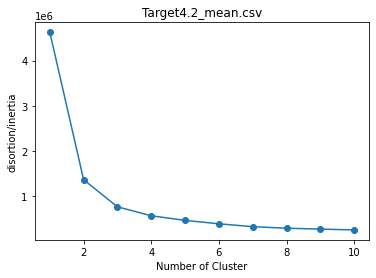

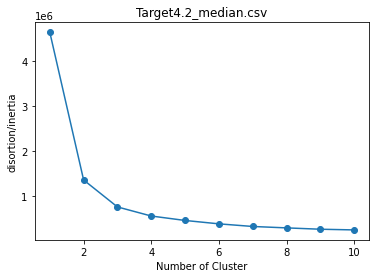

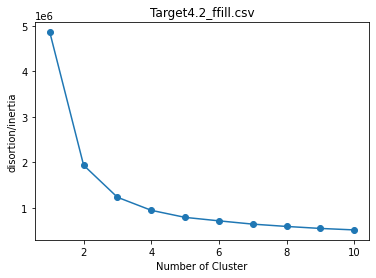

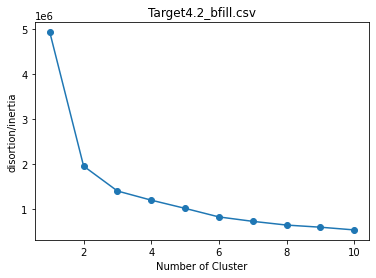

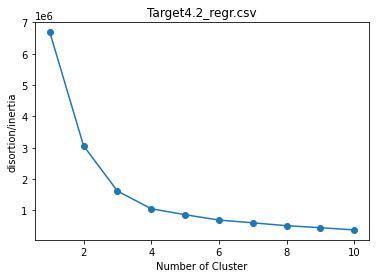

In [49]:
from sklearn.cluster import KMeans;
import matplotlib.pyplot as plt;

%env OMP_NUM_THREADS = 1

for filename in ("Target4.2_mean.csv", "Target4.2_median.csv", "Target4.2_ffill.csv", "Target4.2_bfill.csv", "Target4.2_regr.csv"):
  df = pd.read_csv(filename);
  #remove the country code and income group columns before doing elbow
  df = df.iloc[:, :-1];
  df = df.iloc[:, 1:];
  #print(df);

  inertia = [];
  cluster_range = range(1, 11);

  for num_cluster in cluster_range:
    km = KMeans(num_cluster);
    km.fit(df);
    inertia.append(km.inertia_);
  plt.xlabel("Number of Cluster");
  plt.ylabel("disortion/inertia");
  plt.title(filename);
  plt.plot(cluster_range, inertia);
  plt.scatter(cluster_range, inertia);
  plt.show();

Therefore, for the best number of clusters:

mean: 3

median: 3

ffill: 4

bfill: 4

regr: 4

In [50]:
#dictionary to store corresponding k values
K_values = {
    "Target4.2_mean.csv": 3,
    "Target4.2_median.csv": 3,
    "Target4.2_ffill.csv": 4,
    "Target4.2_bfill.csv": 4,
    "Target4.2_regr.csv": 4,
};

In [51]:
from sklearn import metrics;

for key, value in K_values.items():
  KMClustering = KMeans(n_clusters=value);
  df_km = pd.read_csv(key);
  km_data = df_km.copy().iloc[:, 1:-1];
  #print(km_data);
  km_target = df_km.copy().iloc[:, -1:];
  target = km_target["Income Group"].to_list();
  #print(target);
  KMClustering.fit(km_data);

  #evaluation without labels ----- Silhouette Coefficient
  print(
    key,
    ": Silhouette Coefficient for KMeans: %0.3f"
    % metrics.silhouette_score(km_data, KMClustering.labels_, metric='euclidean')
  );

  #evaluation with labels (country income group) ------ Adjusted Rand Index
  #print(KMClustering.labels_);
  print(
      key,
      ": Adjusted Rand Index for KMeans:",
      metrics.adjusted_rand_score(target, KMClustering.labels_)
  )

Target4.2_mean.csv : Silhouette Coefficient for KMeans: 0.509
Target4.2_mean.csv : Adjusted Rand Index for KMeans: 0.1521490466676321
Target4.2_median.csv : Silhouette Coefficient for KMeans: 0.506
Target4.2_median.csv : Adjusted Rand Index for KMeans: 0.152949643245343
Target4.2_ffill.csv : Silhouette Coefficient for KMeans: 0.474
Target4.2_ffill.csv : Adjusted Rand Index for KMeans: 0.11249917028281031
Target4.2_bfill.csv : Silhouette Coefficient for KMeans: 0.388
Target4.2_bfill.csv : Adjusted Rand Index for KMeans: 0.1571827945187613
Target4.2_regr.csv : Silhouette Coefficient for KMeans: 0.483
Target4.2_regr.csv : Adjusted Rand Index for KMeans: 0.1439081278995332


Hierarchical Clustering

In [52]:
from sklearn.cluster import AgglomerativeClustering;

for key, value in K_values.items():
  df_hc = pd.read_csv(key);
  hc_data = df_hc.copy().iloc[:, 1:-1];
  hc_target = df_hc.copy().iloc[:, -1:];
  target = hc_target["Income Group"].to_list();

  for linkage in ( "average", "complete", "single"):
    HClustering = AgglomerativeClustering(linkage=linkage, n_clusters=value);
    HClustering.fit(hc_data);

    #evaluation without labels ----- Silhouette Coefficient
    print(
      key,
      ": Silhouette Coefficient for Hierarchical Clustering - ",
      linkage,
      " : %0.3f"
      % metrics.silhouette_score(hc_data, HClustering.labels_, metric='euclidean')
    );

    #evaluation with labels (country income group) ------ Adjusted Rand Index
    print(
      key,
      ": Adjusted Rand Index for Hierachical Clustering - ",
      linkage,
      " : ",
      metrics.adjusted_rand_score(target, KMClustering.labels_)
    );

Target4.2_mean.csv : Silhouette Coefficient for Hierarchical Clustering -  average  : 0.533
Target4.2_mean.csv : Adjusted Rand Index for Hierachical Clustering -  average  :  0.1439081278995332
Target4.2_mean.csv : Silhouette Coefficient for Hierarchical Clustering -  complete  : 0.443
Target4.2_mean.csv : Adjusted Rand Index for Hierachical Clustering -  complete  :  0.1439081278995332
Target4.2_mean.csv : Silhouette Coefficient for Hierarchical Clustering -  single  : 0.350
Target4.2_mean.csv : Adjusted Rand Index for Hierachical Clustering -  single  :  0.1439081278995332
Target4.2_median.csv : Silhouette Coefficient for Hierarchical Clustering -  average  : 0.536
Target4.2_median.csv : Adjusted Rand Index for Hierachical Clustering -  average  :  0.1439081278995332
Target4.2_median.csv : Silhouette Coefficient for Hierarchical Clustering -  complete  : 0.416
Target4.2_median.csv : Adjusted Rand Index for Hierachical Clustering -  complete  :  0.1439081278995332
Target4.2_median.csv

As we can learn from the performance metrics above, in terms of the performance of using Hierarchical Clustering, the best linkage for each of the imputation method are :

Imputation Method:

Mean: average ------ Silhouette Coefficient: 0.533

Median: average ------ Silhouette Coefficient: 0.536

Ffill: complete ------ Silhouette Coefficient: 0.449

Bfill: complete ------ Silhouette Coefficient: 0.452

Regression: complete ------ Silhouette Coefficient: 0.545

Birch Clustering

In [53]:
from sklearn.cluster import Birch;

for key, value in K_values.items():
  df_bir = pd.read_csv(key);
  bir_data = df_bir.copy().iloc[:, 1:-1];
  bir_target = df_bir.copy().iloc[:, -1:];
  target = bir_target["Income Group"].to_list();

  BClustering = Birch(n_clusters=value);
  BClustering.fit(bir_data);

  #evaluation without labels ----- Silhouette Coefficient
  print(
    key,
    ": Silhouette Coefficient for Birch: %0.3f"
    % metrics.silhouette_score(bir_data, BClustering.predict(bir_data), metric='euclidean')
  );

  #evaluation with labels (country income group) ------ Adjusted Rand Index
  print(
      key,
      ": Adjusted Rand Index for Birch:",
      metrics.adjusted_rand_score(target, BClustering.predict(bir_data))
  );

Target4.2_mean.csv : Silhouette Coefficient for Birch: 0.505
Target4.2_mean.csv : Adjusted Rand Index for Birch: 0.14291536855133388
Target4.2_median.csv : Silhouette Coefficient for Birch: 0.477
Target4.2_median.csv : Adjusted Rand Index for Birch: 0.13321776569604268
Target4.2_ffill.csv : Silhouette Coefficient for Birch: 0.311
Target4.2_ffill.csv : Adjusted Rand Index for Birch: 0.09325374089112667
Target4.2_bfill.csv : Silhouette Coefficient for Birch: 0.366
Target4.2_bfill.csv : Adjusted Rand Index for Birch: 0.15469634152358347
Target4.2_regr.csv : Silhouette Coefficient for Birch: 0.435
Target4.2_regr.csv : Adjusted Rand Index for Birch: 0.13996129714602068


Because the bigger Silhouette Coefficient is, the better the clustering model is, and so does the Adjusted Rand Index, the closer it is to 1, the better the clustering model is. 

Therefore, according to the calculation above, we can learn that the best clustering methods for each of the imputation method are:

Mean: Hierarchical Clustering ---- average linkage ------ Silhouette Coefficient: 0.533

Median: Hierarchical Clustering ---- average linkage ------ Silhouette Coefficient: 0.536

Ffill: KMeans Clustering ----- Silhouette Coefficient: 0.474

Bfill: Hierarchical Clustering ---- complete linkage ------ Silhouette Coefficient: 0.452

Regression: Hierarchical Clustering ----- complete linkage ---- Silhouette Coefficient: 0.545


Because, 0.545 > 0.536 > 0.533 > 0.474 > 0.452, the best imputation method for clustering is Linear Regression using Hierarchical Clustering with complete linkage.